## Multi-armed Bandit

Based on the [Sutton's book](http://incompleteideas.net/book/RLbook2020.pdf) Chapter 2.3 example, code is adapted from [Multi-Armed Bandits](https://www.thedataincubator.com/blog/2016/07/25/multi-armed-bandits-2/) by Brian Farris.
 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, k):
        self.action_space = k # number of actions (arms)
        self.action_values = np.random.normal(0, 1, self.action_space)
        self.T = np.zeros(self.action_space)
        self.est_values = np.zeros(self.action_space)
        
    def get_reward(self, action):
        noise = np.random.normal(0, 1)
        reward = self.action_values[action] + noise
        return reward
    
    def choose_action(self, epsilon):
        rand_num = np.random.random()
        if epsilon > rand_num:
            return np.random.randint(self.action_space)
        else:
            return np.argmax(self.est_values)
    
    def update_est(self, action, reward):
        self.T[action] += 1
        alpha = 1./self.T[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])  # keeps running average of rewards

In [4]:
np.random.normal(0, 1, 5)

array([-0.59471811, -1.69885241,  1.07444413,  0.64683615,  2.61047384])

In [5]:
def train(bandit, steps, epsilon):
    history = []
    for i in range(steps):
        action = bandit.choose_action(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action, R)
        history.append(R)
    return np.array(history)

In [6]:
episodes = 500
steps = 3000

avg_outcome_eps0p0 = np.zeros(steps)
avg_outcome_eps0p01 = np.zeros(steps)
avg_outcome_eps0p1 = np.zeros(steps)

for i in range(episodes):
    bandit = Bandit(10)
    avg_outcome_eps0p0 += train(bandit, steps, 0.0)
    bandit = Bandit(10)
    avg_outcome_eps0p01 += train(bandit, steps, 0.01)
    bandit = Bandit(10)
    avg_outcome_eps0p1 += train(bandit, steps, 0.1)

avg_outcome_eps0p0 /= np.float(episodes)
avg_outcome_eps0p01 /= np.float(episodes)
avg_outcome_eps0p1 /= np.float(episodes)

/var/folders/n_/cf35cgm124xd2px707tsn4mh0000gn/T/ipykernel_89669/2829553060.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  avg_outcome_eps0p0 /= np.float(episodes)
/var/folders/n_/cf35cgm124xd2px707tsn4mh0000gn/T/ipykernel_89669/2829553060.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  avg_outcome_eps0p01 /= np.float(episodes)

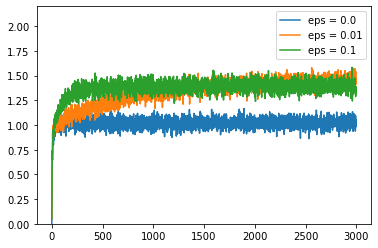

In [7]:
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p01,label="eps = 0.01")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.ylim(0,2.2)
plt.legend()
plt.show()